# SVM Classifier Implementation

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#lets create synthetic data points
from sklearn.datasets import make_classification

In [ ]:
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class= 1, n_redundant= 0, random_state=2)

In [ ]:
x = pd.DataFrame(X)[0]
x2 = pd.DataFrame(X)[1]

<Axes: xlabel='0', ylabel='1'>

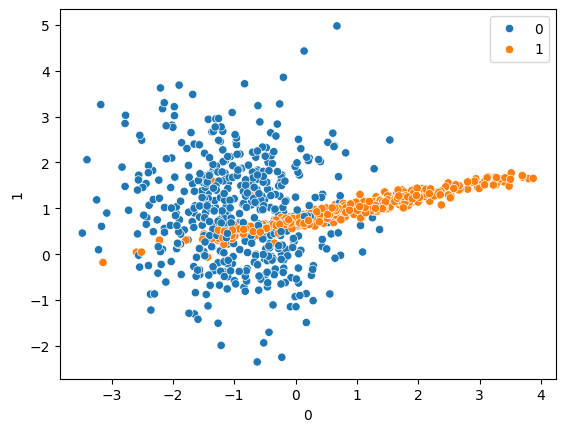

In [ ]:
sns.scatterplot(x= pd.DataFrame(X)[0], y = pd.DataFrame(X)[1], hue = y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(kernel= 'linear')

In [ ]:
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       120
           1       0.82      0.84      0.83       130

    accuracy                           0.82       250
   macro avg       0.82      0.82      0.82       250
weighted avg       0.82      0.82      0.82       250

[[ 96  24]
 [ 21 109]]


In [ ]:
from sklearn.model_selection import GridSearchCV

#defining param range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [ ]:
grid = GridSearchCV(SVC(), param_grid= param_grid, refit=True, cv = 5, verbose=3)

In [ ]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.847 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.853 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.860 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.827 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
grid.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.87      0.90       120
           1       0.89      0.95      0.92       130

    accuracy                           0.91       250
   macro avg       0.92      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250

[[104  16]
 [  6 124]]
